In [27]:
import pandas as pd
import matplotlib.pylab as plt
import glob
import numpy as np
from tqdm.notebook import tqdm

from matplotlib.cm import rainbow

from scipy.special import gamma

from joblib import Parallel, delayed

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

/var/folders/_r/6hvfrncn0gb3rk22vwnq62gh0000gn/T/ipykernel_1227/3126453290.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_b = (1 / m) * _buff_
/var/folders/_r/6hvfrncn0gb3rk22vwnq62gh0000gn/T/ipykernel_1227/3126453290.py:22: RuntimeWarning: invalid value encountered in double_scalars
  sigma_b = (1 / m) * _buff_


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

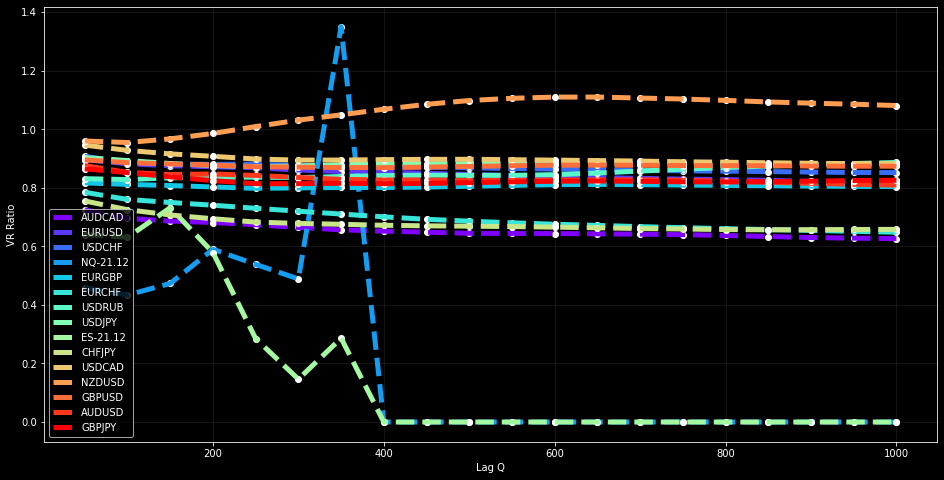

In [20]:
def variance_ratio(q_position, df: pd.DataFrame):
    MR = list()

    result_array = list()
    q_array = list()
    #   Create time_lags like 2 ** k
    #time_lags = [1] + [2 ** i for i in range(1, q_position+1)]
    ret = np.log(df.close.dropna())
    #ret = ret.pct_change()[1:].dropna()
    #ret = ret.diff().dropna()
    time_lags = np.arange(0, 2 ** q_position, 50)
    for EA, time_lag in tqdm(enumerate(time_lags), total=len(time_lags), leave=False):
        buff_size = len(ret)
        means = (1 / buff_size) * np.sum(ret.diff().dropna())
        m = time_lag * (buff_size - time_lag + 1) * (1 - (time_lag / buff_size))
        sigma_a = (1 / (buff_size - 1)) * np.sum(np.square(ret.diff().dropna() - means))
        _buff_ = 0
        _arr_buff_ = ret.values
        for k in range(time_lag, buff_size):
            _buff_ += np.square(_arr_buff_[k] - _arr_buff_[k - time_lag] - time_lag * means)
        del _arr_buff_
        sigma_b = (1 / m) * _buff_
        result = (sigma_b / sigma_a)
        plt.plot(time_lag, result, 'o', color='white')
        plt.grid(alpha=.1)
        result_array.append(result)
        q_array.append(time_lag)
    return result_array, q_array


RESULTS = list()
files = glob.glob('zip_data/*.csv')[:]
colors = rainbow(np.linspace(0, 1, len(files)))
plt.figure(figsize=(16,8))
plt.grid()
plt.ylabel('VR Ratio')
plt.xlabel('Lag Q')

for arrow, _ in tqdm(enumerate(files), total=len(files)):
    name = _.split('/')[1][:-4]
    data = pd.read_csv(_)
    res, q = variance_ratio(10, data.dropna())
    plt.plot(q, res, '--', color=colors[arrow], linewidth=5, label=name)
    RESULTS.append([name, res, q])
plt.legend()
plt.show()

In [10]:
data =pd.read_csv('zip_data/USDCAD.csv')
data

,time,open,high,low,close
0,2018-11-01 00:15:00,1.315990,1.316140,1.315855,1.316000
1,2018-11-01 00:16:00,1.316000,1.316080,1.315900,1.316040
2,2018-11-01 00:17:00,1.316040,1.316040,1.315870,1.315975
3,2018-11-01 00:18:00,1.315975,1.316175,1.315975,1.316010
4,2018-11-01 00:19:00,1.316010,1.316065,1.315995,1.315995
...,...,...,...,...,...
1071359,2021-11-13 00:55:00,1.254985,1.255100,1.254980,1.255030
1071360,2021-11-13 00:56:00,1.255030,1.255175,1.254990,1.255175
1071361,2021-11-13 00:57:00,1.255175,1.255305,1.255175,1.255305
1071362,2021-11-13 00:58:00,1.255305,1.255345,1.255300,1.255305


  0%|          | 0/4 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/var/folders/_r/6hvfrncn0gb3rk22vwnq62gh0000gn/T/ipykernel_1227/3025142152.py:63: RuntimeWarning: invalid value encountered in true_divide
/var/folders/_r/6hvfrncn0gb3rk22vwnq62gh0000gn/T/ipykernel_1227/3025142152.py:63: RuntimeWarning: invalid value encountered in true_divide
/var/folders/_r/6hvfrncn0gb3rk22vwnq62gh0000gn/T/ipykernel_1227/3025142152.py:63: RuntimeWarning: invalid value encountered in true_divide
/var/folders/_r/6hvfrncn0gb3rk22vwnq62gh0000gn/T/ipykernel_1227/3025142152.py:63: RuntimeWarning: invalid value encountered in true_divide
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed: 13.5min remaining: 13.5min
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 14.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 14.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent worker

TypeError: expected non-empty vector for x

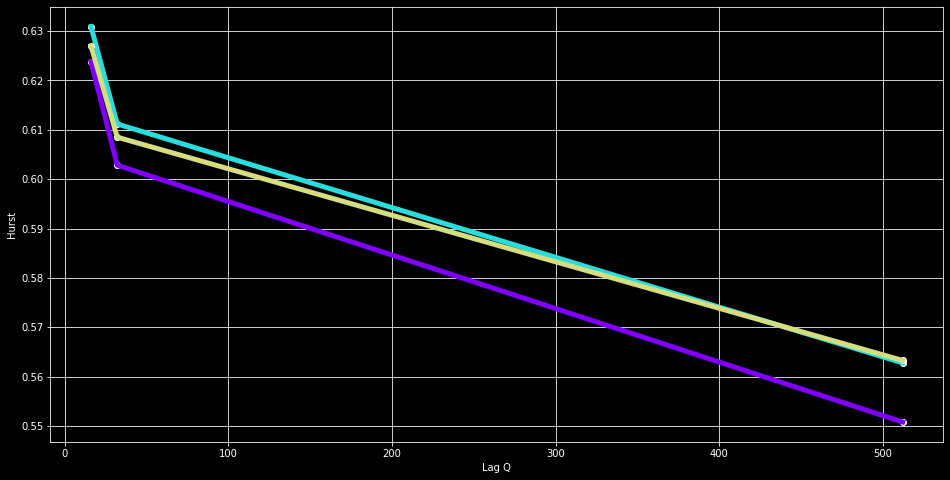

In [35]:
def _start_duplicates_removing(inp_data):
    #   Clean duplicates
    ret_data = inp_data.reset_index().drop_duplicates(subset='index', keep='first').set_index('index')
    #   Check success of cleaning
    assert len(ret_data.index) == len(ret_data.index.unique())
    print(f'Duplicates at {1 - (ret_data.shape[0] / inp_data.shape[0]):.2%} of data')
    return ret_data

def normalize_data(inp_data: pd.DataFrame, show=True):
    #   Calculate the right numbers of observations intra day
    NORMAL_MINUTES = (15 - 9) * 60 + 59 - 29
    #   Checks for duplicates
    if show:
        plt.style.use('dark_background')
        plt.figure(figsize=(12,8))
        plt.subplot(2,1,1)
        plt.plot(inp_data.close, 'o', markersize=.3, color='red', alpha=.6)
        plt.title('Input data')

    if len(inp_data.index) != len(inp_data.index.unique()):
        inp_data = _start_duplicates_removing(inp_data)
    #   In data not of all information about trade-day. For example at date 2011-12-19 data ends at 15:59. At date 2015-12-19 data ends at 16:14. Notice that normal trade day ends at 16:30.
    #   At start lets drop lines with days with zero observations.
    mask = ~np.in1d(inp_data.index.date,inp_data.resample('1D').count().query(f'open < {NORMAL_MINUTES}').index.date)

    if show:
        plt.subplot(2,1,2)
        plt.plot(inp_data.loc[mask,:].close, 'o', markersize=.3, color='red', alpha=.6)
        plt.title('Cut data')
        plt.show()
    #   Shows percent of "bad" dotes
    print(f"Bad days at {1 - (len(mask) / len(inp_data)):.2%} observations")
    return inp_data.loc[mask,:]


np.random.seed(124)
sample_size = 100000
scalar = 100

def _hurst_estimate_time_lag(time_lag, inp_data):
    """
    Return mean_RS on input_batch
    :param time_lag: time_lag
    :param inp_data: input_data
    :return: meanRS calculates like mean of R/S array on input_data splited into d batches d == len(inp_data) // time_lag
    """
    #   Create batches with length == time_lag. Into this batches we will calculate R/S parameter and then take mean of R/S array
    number_of_sub_series = len(inp_data) // time_lag
    R_array = list()
    S_array = list()
    for sub_serial in range(0, number_of_sub_series):
        buffer_data = inp_data[sub_serial * time_lag:(sub_serial + 1) * time_lag]
        #   This dumb way sry..
        if len(buffer_data) == 0:
            break
        buffer_mean = np.nanmean(buffer_data)
        normalized = np.subtract(buffer_data, buffer_mean)
        cumulative_normalized = np.cumsum(normalized)
        #   In formula ddof=0 but i'm not sure that this is correct (Previously we calculate mean so...)
        standard_deviation = np.nanstd(buffer_data, ddof=0)
        R_array.append(max(cumulative_normalized) - min(cumulative_normalized))
        S_array.append(standard_deviation)
    mean_RS = np.nanmean(np.divide(R_array, S_array))
    return mean_RS

def _hurst_runner(inp_data, HYPERPARAM_0, ANIS_LLOYD):
    from scipy.special import gamma


    Q_ARRAY = [2 ** q for q in range(1, int(np.log2(len(inp_data)) / HYPERPARAM_0))]
    #print(Q_ARRAY)
    #M = len(inp_data) / 2
    #Q_ARRAY = [q for q in range(5, int(M / HYPERPARAM_0), int(M / HYPERPARAM_0) // 10)]
    #Q_ARRAY = [2 ** q for q in range(1, int(np.log(len(inp_data))))]
    RS_ARRAY = list()

    for _ in Q_ARRAY:
        RS_ARRAY.append(_hurst_estimate_time_lag(_, inp_data))

    Q_ARRAY = Q_ARRAY[1:]
    RS_ARRAY = RS_ARRAY[1:]
    if not ANIS_LLOYD:
        POLYFIT = np.polyfit(np.log(Q_ARRAY), np.log(RS_ARRAY), deg=1)
    if ANIS_LLOYD:
        ALC = list()
        for ABC in Q_ARRAY:
            if ABC <= 340:
                ALC.append(gamma((ABC - 1) / 2) * np.sum([np.sqrt((ABC - i) / i) for i in range(1, ABC -1)]) / (np.sqrt(np.pi) * gamma(ABC / 2)))
            if ABC > 340:
                ALC.append(np.sum([np.sqrt((ABC - i) / i) for i in range(1, ABC -1)]) / np.sqrt(ABC * np.pi / 2))
        POLYFIT = np.polyfit(np.log(Q_ARRAY), np.log(RS_ARRAY) - np.log(ALC) + np.log(Q_ARRAY) / 2, deg=1)
    # print(f'FOR sample_len={HYPERPARAM_0} MAX Q = {Q_ARRAY[-1]}\nn * {POLYFIT[0]} + {POLYFIT[1]}\n================')
    #print(f'FOR LAG Q={Q_ARRAY[-1]} HURST EXPONENT={POLYFIT[0]}')
    return POLYFIT[0], POLYFIT[1], Q_ARRAY[-1]

def hurst_optimizer(inp_data, ANIS_LLOYD=False, simplify=1):

    def use_hurst_runner(HYPER):
        CF_a, CF_b, Q = _hurst_runner(inp_data, HYPERPARAM_0=HYPER, ANIS_LLOYD=ANIS_LLOYD)
        print('PRIMT')
        return [CF_a, CF_b, Q]

    #inp_data = np.log(inp_data)
    inp_data = np.diff(inp_data) / inp_data[:-1]
    #for HYPER in range(int(np.log(len(inp_data)) / 2), 1, -1):
    # for HYPER in tqdm(np.arange(4,1.5,-0.2 * simplify)):
    #     CF_a, CF_b, HYPERMARAM = _hurst_runner(inp_data, HYPERPARAM_0=HYPER, ANIS_LLOYD=ANIS_LLOYD)
    #     plt.plot((2 ** int(np.log2(len(inp_data)) / HYPER)), CF_a,  'o', color='blue', markersize=2, alpha=.7)
    #     return [CF_a, CF_b, HYPERMARAM]
    #HYPER_ARRAY = np.arange(4,1.5,-0.2 * simplify)
    HYPER_ARRAY = np.arange(5,1.5,-0.2 * simplify)
    results = Parallel(n_jobs=-1, verbose=10)(delayed(use_hurst_runner)(HYPER) for HYPER in HYPER_ARRAY)
    #for i, CF in enumerate(results):
    #    plt.plot(CF[2], CF[0], 'o', color='blue', markersize=2, alpha=.7)
    plt.plot([_[2]for _ in results[1:]], [_[0]for _ in results[1:]], 'o', color='white')
    return results

RESULTS_HURST = list()
files = glob.glob('zip_data/*.csv')[:4]
colors = rainbow(np.linspace(0, 1, len(files)))
plt.figure(figsize=(16,8))
plt.grid()
plt.ylabel('Hurst')
plt.xlabel('Lag Q')


for arrow, _ in tqdm(enumerate(files), total=len(files)):
    name = _.split('/')[1][:-4]
    data = pd.read_csv(_).dropna()
    res = hurst_optimizer(data.close, simplify=5)
    plt.plot([_[2]for _ in res[1:]], [_[0]for _ in res[1:]], color=colors[arrow], linewidth=5, label=name)
    RESULTS_HURST.append([name, res])
plt.legend()
plt.show()